# **Mounting drive**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Downloading the Data**

In [ ]:
!gdown 1ojaJLmM6sar58i0WZ9_C5j7gwBc1chLl

Downloading...
From: https://drive.google.com/uc?id=1ojaJLmM6sar58i0WZ9_C5j7gwBc1chLl
To: /content/Movie_Reviews.csv
100% 66.2M/66.2M [00:00<00:00, 265MB/s]


# **Downloading Libraries**

In [ ]:
!pip install transformers -q # installing hugging face library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 31.7 MB/s 
     |████████████████████████████████| 352 kB 73.4 MB/s 
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 662 kB 68.8 MB/s 
     |████████████████████████████████| 5.8 MB 67.5 MB/s 
     |████████████████████████████████| 1.3 MB 59.4 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 1.1 MB 63.3 MB/s 
     |████████████████████████████████| 118 kB 70.2 MB/s 
     |████████████████████████████████| 238 kB 77.8 MB/s 
     |████████████████████████████████| 439 kB 71.5 MB/s 
     |████████████████████████████████| 1.7 MB 64.5 MB/s 
     |████████████████████████████████| 6.0 MB 67.7 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=96219d18ed8529f567bd193928ee61603d64b60bd08287910959b72cdfa442

In [ ]:
!pip install tensorflow-addons -q # used in importing Chechpoint and Livelossplot
!pip install livelossplot -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U nltk -q

     |████████████████████████████████| 4.6 MB 14.0 MB/s 
     |████████████████████████████████| 511.8 MB 24 kB/s 
     |████████████████████████████████| 5.8 MB 68.3 MB/s 
     |████████████████████████████████| 438 kB 72.7 MB/s 
     |████████████████████████████████| 1.6 MB 31.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.11.2 requires tensorflow~=2.11.0, but you have tensorflow 2.9.3 which is incompatible.
tf-models-official 2.11.2 requires tensorflow-text~=2.11.0, but you have tensorflow-text 2.9.0 which is incompatible.


In [ ]:
!pip install -U "tensorflow-text==2.15.*" -q
!pip install -U "tf-models-official==2.15.*" -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 20.1 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


# **Helper Functions**


## Data Cleaning

In [ ]:
import nltk
import re # Used for cleaning HTML tags
import string # Used for cleaning punctuation
from gensim.parsing.preprocessing import remove_stopwords #used to remove stop words (unlike nltk it considers however as a stopword)
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#Downloading Word datasets used in lemmatization
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def preprocess(data):
   lemmatizer = WordNetLemmatizer()
   for i in data.index :  #Does the preprocess to each element in the dataset seperately
    temptxt= data['review'][i]
    temptxt= temptxt.translate(str.maketrans('', '', string.punctuation)) #Removes punctuations from string

    temptxt= temptxt.lower() #Applies lowercase to the entire review string

    temptxt= remove_stopwords(temptxt) #Removes stopwords from the review string



    word_list = word_tokenize(temptxt) #Transforms review from String to a 1d array where each word is an element to lemmatize seperatly
    clean_words= ' '.join([lemmatizer.lemmatize(w) for w in word_list])

    data['review'][i]= clean_words
   return data

In [ ]:
def Remove_tag(data):
   Cleaner =  re.compile('<.*?>')
   for i in data.index :
       data['review'][i]= re.sub(Cleaner,"", data['review'][i]) #Removes br tags
   return data


## Evaluation Metrics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

In [ ]:
def Eval (test_labels, y_pred):
  f1 = f1_score(test_labels, y_pred)
  confusion_mat = confusion_matrix(test_labels, y_pred, labels=[0,1])
  accuracy = accuracy_score(test_labels, y_pred)
  precision = precision_score(test_labels, y_pred)
  recall = recall_score(test_labels, y_pred)
  specificity = confusion_mat[1,1]/ (confusion_mat[1,0] + confusion_mat[1,1])

  print("F1 Score   --> ", round(f1,3))
  print("Accuracy   --> ", round(accuracy,3))
  print("Precision  --> ", round(precision,3))
  print("Specificty --> ", round(specificity,3))
  print("Recall     --> ", round(recall,3))
  print("Confusion Matrix :\n", confusion_mat)

  disp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['negative','positive'])
  fig, ax = plt.subplots(figsize=(4,4))
  disp.plot(ax = ax)
  plt.show()

## Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Stop training early if, after 5 epochs, validation accuracy doesn't increase.
stop_early = EarlyStopping(
    patience=5,
    monitor='val_binary_accuracy',
    restore_best_weights=True, # restore the model back to the best state
)

# **Preprocessing Text Data**

In [ ]:
import pandas as pd # Read csv file
df= pd.read_csv('Movie_Reviews.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
Data_nrm = Remove_tag(df) #Removing Break HTML tags in text

##Normal Data




In [ ]:
#This is the normal dataset where it isn't preprocessed

Data_nrm['binary']=Data_nrm['sentiment'].apply(lambda x: 1 if x=='negative' else 0) # Adding a layer of binary numbers to dataset for encoding and decoding
df.head()

,review,sentiment,binary
0,One of the other reviewers has mentioned that ...,positive,0
1,A wonderful little production. The filming tec...,positive,0
2,I thought this was a wonderful way to spend ti...,positive,0
3,Basically there's a family where a little boy ...,negative,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0


In [ ]:
from sklearn.model_selection import train_test_split
#Splitting normal data  into train and test datasets
train_nrm, test_nrm, train_labels_nrm, test_labels_nrm = train_test_split(
    Data_nrm['review'],
    Data_nrm['binary'],
    test_size=0.2
)


##Preprocessed Data




In [ ]:
#Using helper function We preprocess the data to Remove Punctiuations,to change uppercased letters to lower case,remove stop words and Finally lemmatize each word
Data_pre=preprocess(Data_nrm)

<ipython-input-8-83f49fd390b6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review'][i]= clean_words


In [ ]:
Data_pre['binary']=Data_pre['sentiment'].apply(lambda x: 1 if x=='negative' else 0) # Adding a layer of binary numbers to dataset for encoding and decoding
df.head()

,review,sentiment,binary
0,reviewer mentioned watching 1 oz episode youll...,positive,0
1,wonderful little production filming technique ...,positive,0
2,thought wonderful way spend time hot summer we...,positive,0
3,basically there family little boy jake think t...,negative,1
4,petter matteis love time money visually stunni...,positive,0


In [ ]:
from sklearn.model_selection import train_test_split

#Splitting preprocessed dataset into train and test datasets

train_pre, test_pre, train_labels_pre, test_labels_pre = train_test_split(
    Data_pre['review'],
    Data_pre['binary'],
    test_size=0.2
)


# **Optimizer**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam, Optimizer
from official.nlp import optimization
import tensorflow_text as text
import tensorflow_hub as hub

In [ ]:
tf.autograph.experimental.do_not_convert(
    func=None
)
epochs = 10
init_lr = 3e-4

### With Preprocessing

In [ ]:
train_dataset_pre = tf.data.Dataset.from_tensor_slices(train_pre)
steps_per_epoch_pre = tf.data.experimental.cardinality(train_dataset_pre).numpy()
num_train_steps_pre = steps_per_epoch_pre * epochs
num_warmup_steps_pre = int(0.1*num_train_steps_pre)

optimizer_pre = optimization.create_optimizer(init_lr = init_lr,
                                              num_train_steps = num_train_steps_pre,
                                              num_warmup_steps = num_warmup_steps_pre,
                                              optimizer_type='adamw')

### Without Preprocessing

In [ ]:
train_dataset_nrm = tf.data.Dataset.from_tensor_slices(train_nrm)
steps_per_epoch_nrm = tf.data.experimental.cardinality(train_dataset_nrm).numpy()
num_train_steps_nrm = steps_per_epoch_nrm * epochs
num_warmup_steps_nrm = int(0.1*num_train_steps_nrm)

optimizer_nrm = optimization.create_optimizer(init_lr = init_lr,
                                              num_train_steps = num_train_steps_nrm,
                                              num_warmup_steps = num_warmup_steps_nrm,
                                              optimizer_type='adamw')

# **BERT Model**

### **Building Model**


In [ ]:
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam,Optimizer
from tensorflow.keras.losses import binary_crossentropy

In [ ]:
BERT_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',name="preprocessing")
#Getting tokenizer from kerashub that will tokenize our data

BERT_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4',name="encoder",trainable= True)
#Getting BERT model that is already pretrained

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = BERT_preprocess(text_input)
outputs = BERT_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="Dropout")(outputs['pooled_output'])
for i in [512,256,128,64]:
    l = tf.keras.layers.Dense(i, activation='sigmoid', name="Dense_Layer_" + str(i))(l)
l = tf.keras.layers.Dense(1,activation='sigmoid',name="output")(l)
# Use inputs and outputs to construct a final model
BERT_model = tf.keras.Model(inputs=text_input, outputs = l)

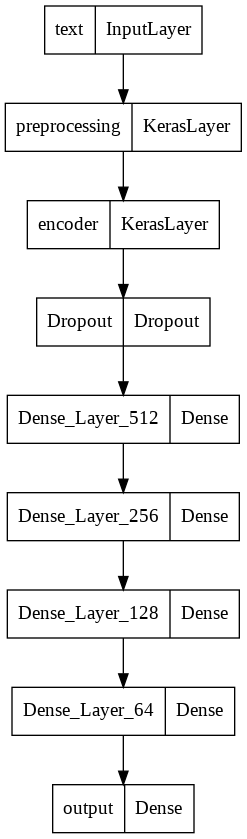

In [ ]:
tf.keras.utils.plot_model(BERT_model)

## With Preprocessing

### **Training**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from livelossplot import PlotLossesKeras

save_weights = ModelCheckpoint(   # Saving Weights where validation accuracy is the best
    filepath='/content/drive/MyDrive/Text_checkpoints/Bert_pre/checkpoint',
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
BERT_model.compile(optimizer=optimizer_pre,
                         loss="binary_crossentropy",
                          metrics="binary_accuracy")

In [ ]:
tf.autograph.experimental.do_not_convert(
    func=None
)
BERT_model.fit(x=train_pre,
          y=train_labels_pre,
          validation_split = 0.125 ,
          batch_size =32,
          epochs=epochs,
           callbacks =[stop_early,PlotLossesKeras(),save_weights])

Epoch 1/10
   9/1094 [..............................] - ETA: 15:03 - loss: 0.6931 - binary_accuracy: 0.5104

KeyboardInterrupt: ignored

###Testing

In [ ]:
BERT_model.load_weights('/content/drive/MyDrive/Text_checkpoints/Bert_pre/checkpoint')

In [ ]:
BERT_model.evaluate(test_pre,test_labels_pre)

313/313 [==============================] - 105s 325ms/step - loss: 0.1844 - binary_accuracy: 0.9495


[0.18444125354290009, 0.9495000243186951]

In [ ]:
prediction = BERT_model.predict(test_pre)

313/313 [==============================] - 102s 323ms/step


In [ ]:
text_to_test = ["I love this movie"]
prediction = BERT_model.predict(text_to_test)
prediction

### Evaluation Metrics

In [ ]:
y_preds = prediction.flatten()
y_preds = np.where(y_preds > 0.5, 1, 0)

F1 Score   -->  0.95
Accuracy   -->  0.95
Precision  -->  0.951
Specificty -->  0.949
Recall     -->  0.949
Confusion Matrix :
 [[4711  248]
 [ 257 4784]]


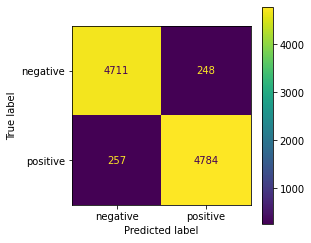

In [ ]:
Eval(test_labels_pre, y_preds)

##Without Preprocessing


### **Training**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from livelossplot import PlotLossesKeras

save_weights = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Text_checkpoints/Bert_nrm/checkpoint',
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
BERT_model.compile(optimizer=optimizer_nrm,
                         loss="binary_crossentropy",
                          metrics="binary_accuracy")

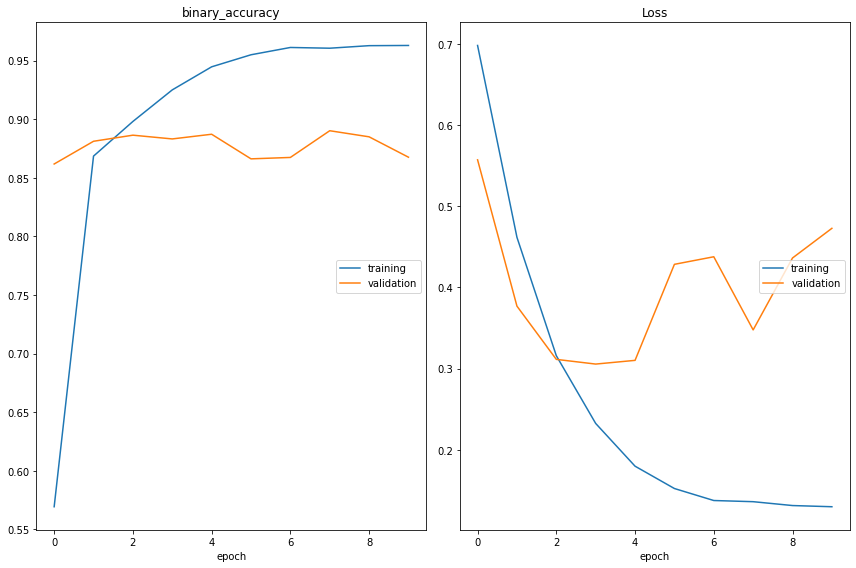

binary_accuracy
	training         	 (min:    0.569, max:    0.963, cur:    0.963)
	validation       	 (min:    0.862, max:    0.890, cur:    0.868)
Loss
	training         	 (min:    0.130, max:    0.698, cur:    0.130)
	validation       	 (min:    0.306, max:    0.557, cur:    0.473)
1094/1094 [==============================] - 1013s 926ms/step - loss: 0.1299 - binary_accuracy: 0.9630 - val_loss: 0.4728 - val_binary_accuracy: 0.8676


In [ ]:
tf.autograph.experimental.do_not_convert(
    func=None
)
BERT_model.fit(x=train_nrm,
          y=train_labels_nrm,
          validation_split = 0.125 ,
          batch_size =32,
          epochs=epochs,
          callbacks =[stop_early,PlotLossesKeras(),save_weights])

###Testing

In [ ]:
BERT_model.load_weights('/content/drive/MyDrive/Text_checkpoints/Bert_nrm/checkpoint')

In [ ]:
BERT_model.evaluate(test_nrm,test_labels_nrm)

313/313 [==============================] - 98s 314ms/step - loss: 0.3485 - binary_accuracy: 0.8921


[0.34849098324775696, 0.8920999765396118]

In [ ]:
prediction = BERT_model.predict(test_nrm)

NameError: ignored

In [ ]:
text_to_test = ["I love this movie"]
prediction = BERT_model.predict(text_to_test)
prediction

### Evaluation Metrics

In [ ]:
y_preds = prediction.flatten()
y_preds = np.where(y_preds > 0.5, 1, 0)

In [ ]:
Eval(test_labels_nrm, y_preds)

# **ROBERTA Model**

### **Building Model**

In [ ]:
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam,Optimizer
from tensorflow.keras.losses import binary_crossentropy
from official.nlp import optimization  # to create AdamW optimizer

In [ ]:
ROBERTA_preprocess = hub.KerasLayer('https://tfhub.dev/jeongukjae/roberta_en_cased_preprocess/1',name="preprocessing")
ROBERTA_encoder = hub.KerasLayer('https://tfhub.dev/jeongukjae/roberta_en_cased_L-12_H-768_A-12/1',name="encoder")

In [ ]:
# ROBERTA layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = ROBERTA_preprocess(text_input)
outputs = ROBERTA_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="Dropout")(outputs['pooled_output'])
for i in [512,256,128,64]:
    l = tf.keras.layers.Dense(i, activation='sigmoid', name="Dense_Layer_" + str(i))(l)
l = tf.keras.layers.Dense(1,activation='sigmoid',name="output")(l)
# Use inputs and outputs to construct a final model
ROBERTA_model = tf.keras.Model(inputs=text_input, outputs = l)

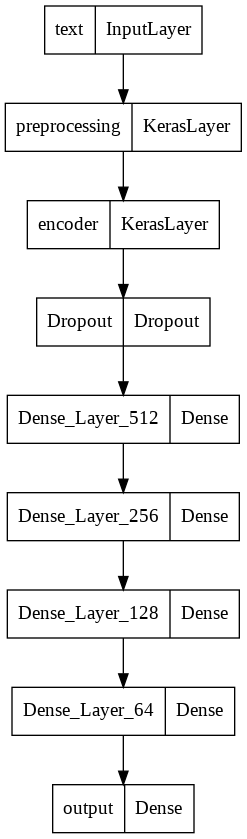

In [ ]:
tf.keras.utils.plot_model(ROBERTA_model)

## With Preprocessing



### **Training**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from livelossplot import PlotLossesKeras

tf.autograph.experimental.do_not_convert(
    func=None
)
save_weights = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Text_checkpoints/Robert_pre/checkpoint',
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
ROBERTA_model.compile(optimizer=optimizer_pre,
                         loss="binary_crossentropy",
                          metrics="binary_accuracy")

In [ ]:
tf.autograph.experimental.do_not_convert(
    func=None
)
ROBERTA_model.fit(x=train_pre,
          y=train_labels_pre,
          validation_split = 0.125 ,
          batch_size =1,
          epochs=epochs,
           callbacks =[stop_early,PlotLossesKeras(),save_weights])

Epoch 1/10
 1756/35000 [>.............................] - ETA: 3:31:08 - loss: 0.7122 - binary_accuracy: 0.5120

### **Testing**

In [ ]:
ROBERTA_model.load_weights('/content/drive/MyDrive/Text_checkpoints/Roberta_pre/checkpoint')

In [ ]:
ROBERTA_model.evaluate(test_pre,test_labels_pre)

In [ ]:
prediction = ROBERTA_model.predict(test_pre)

### Evaluation Metrics

In [ ]:
y_preds = prediction.flatten()
y_preds = np.where(y_preds > 0.5, 1, 0)

In [ ]:
Eval(test_labels_pre, y_pred)

F1 Score   -->  0.949
Accuracy   -->  0.949
Precision  -->  0.952
Specificty -->  0.947
Recall     -->  0.947
Confusion Matrix :
 [[4722  243]
 [ 266 4769]]


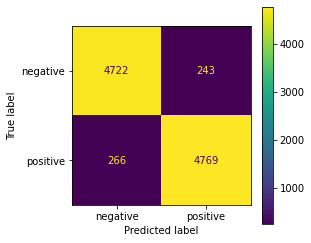

## Without Preprocessing

### **Training**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from livelossplot import PlotLossesKeras

tf.autograph.experimental.do_not_convert(
    func=None
)
save_weights = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Text_checkpoints/Robert_nrm/checkpoint',
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
ROBERTA_model.compile(optimizer=optimizer_nrm,
                         loss="binary_crossentropy",
                          metrics="binary_accuracy")

In [ ]:
tf.autograph.experimental.do_not_convert(
    func=None
)
ROBERTA_model.fit(x=train_nrm,
          y=train_labels_nrm,
          validation_split = 0.125 ,
          batch_size =1,
          epochs=epochs,
          callbacks =[stop_early,PlotLossesKeras(),save_weights])

Epoch 1/10
   1/1094 [..............................] - ETA: 10:04:44 - loss: 0.6173 - binary_accuracy: 0.6875

KeyboardInterrupt: ignored

### **Testing**

In [ ]:
ROBERTA_model.load_weights('/content/drive/MyDrive/Text_checkpoints/Roberta_nrm/checkpoint')

In [ ]:
ROBERTA_model.evaluate(test_nrm,test_labels_nrm)

In [ ]:
prediction = ROBERTA_model.predict(test_nrm)

313/313 [==============================] - 101s 322ms/step


### Evaluation Metrics

In [ ]:
y_preds = prediction.flatten()
y_preds = np.where(y_preds > 0.5, 1, 0)

In [ ]:
Eval(test_labels_nrm, y_pred)

F1 Score   -->  0.949
Accuracy   -->  0.949
Precision  -->  0.952
Specificty -->  0.947
Recall     -->  0.947
Confusion Matrix :
 [[4722  243]
 [ 266 4769]]


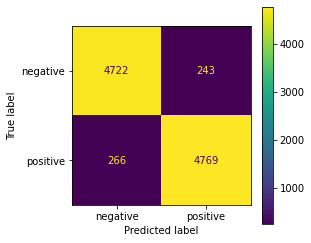

# **RNN Model**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional
from keras.optimizers import Adam, Optimizer
from keras.losses import binary_crossentropy
from keras.callbacks import ModelCheckpoint
from livelossplot import PlotLossesKeras
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

##With Preprocessing

### Building The Model



In [ ]:
max_tokens = 1000 #vocab size
max_len = 100
##Text Vectorization (Encoder)
# This layer processes the input string and turns it into a sequence of
# max_len integers, each of which maps to a certain token.
encoder = TextVectorization(
  # Max vocab size. Any words outside of the max_tokens most common ones
  # will be treated the same way: as "out of vocabulary" (OOV) tokens.
  max_tokens=max_tokens,
  # Output integer indices, one per string token
  output_mode="int",
  # Always pad or truncate to exactly this many tokens
  output_sequence_length=max_len,
)

In [ ]:
# Call adapt(), which fits the TextVectorization layer to our text dataset.
# This is when the max_tokens most common words (i.e. the vocabulary) are selected.
encoder.adapt(train_pre)

In [ ]:
#Sequential model is used here since all the layers in the model only have single input and produce single output.
RNN_model = Sequential()
RNN_model.add(Input(shape=(1,), dtype="string"))
#The first layer is the encoder, which converts the text to a sequence of token indices
RNN_model.add(encoder)
#This layer turns each integer (representing a token) from the previous layer
#An embedding layer stores one vector per word. When called,
#it converts the sequences of word indices to sequences of vectors.
#These vectors are trainable. After training (on enough data),
#words with similar meanings often have similar vectors.
#The embedding layer uses masking to handle the varying sequence-lengths. All the layers after the Embedding support masking:
# Note that we're using max_tokens + 1 here, since there's an
# out-of-vocabulary (OOV) token that gets added to the vocab.
RNN_model.add(Embedding((max_tokens + 1), 128))
#The RNN Layer processes sequence input by iterating through the elements.
#RNNs pass the outputs from one timestep to their input on the next timestep.
##The main advantage of a bidirectional RNN is that the signal from the beginning of the input doesn't need to be processed all the way through every timestep to affect the output.
##The main disadvantage of a bidirectional RNN is that you can't efficiently stream predictions as words are being added to the end.
RNN_model.add(Bidirectional(LSTM(64,  return_sequences=True)))
##optional part :
#RNN with return_sequences=True is that the output still has 3-axes, like the input, so it can be passed to another RNN layer, like this:
RNN_model.add(Bidirectional(LSTM(32)))
#After the RNN has converted the sequence to a single vector the two dense layers do some final processing,
#and convert from this vector representation to a single logit as the classification output.
RNN_model.add(Dense(64, activation="relu"))
RNN_model.add(Dense(1, activation="sigmoid"))

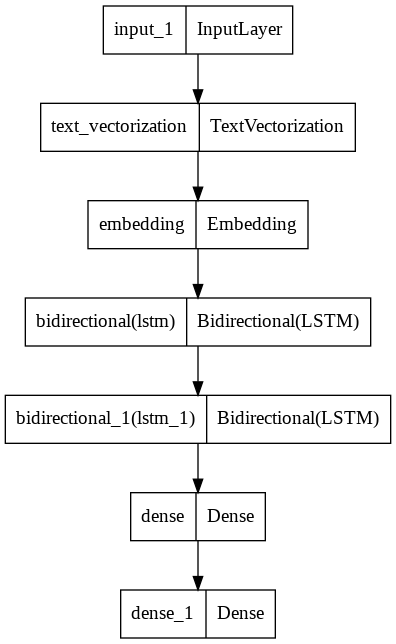

In [ ]:
tf.keras.utils.plot_model(RNN_model)

### Training

In [ ]:
save_weights = ModelCheckpoint(   # Saving Weights where validation accuracy is the best
    filepath='/content/drive/MyDrive/Text_checkpoints/RNN_pre/checkpoint',
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
RNN_model.compile(loss="binary_crossentropy", optimizer = optimizer_pre, metrics=["accuracy"])

In [ ]:
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 100)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 100, 128)          128128    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                        

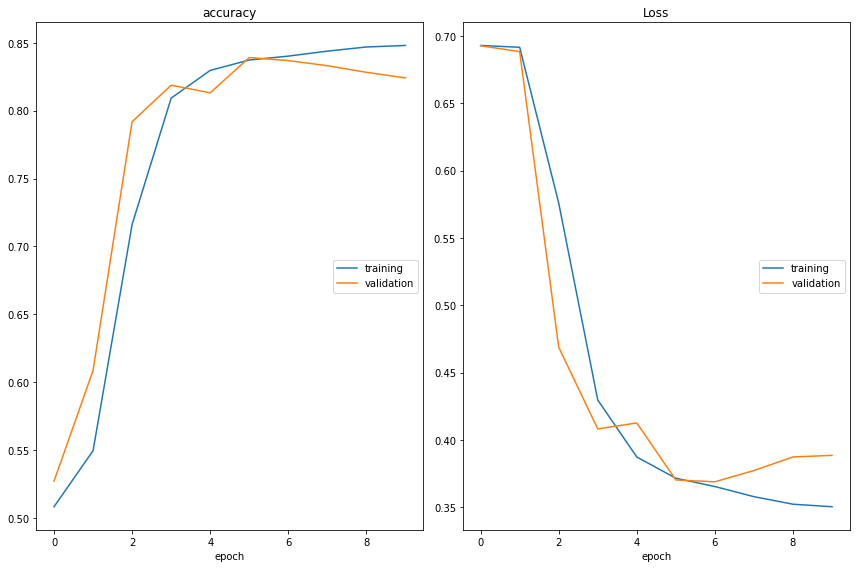

accuracy
	training         	 (min:    0.508, max:    0.848, cur:    0.848)
	validation       	 (min:    0.527, max:    0.839, cur:    0.824)
Loss
	training         	 (min:    0.350, max:    0.693, cur:    0.350)
	validation       	 (min:    0.369, max:    0.693, cur:    0.389)
1000/1000 [==============================] - 22s 22ms/step - loss: 0.3504 - accuracy: 0.8480 - val_loss: 0.3886 - val_accuracy: 0.8241


In [ ]:
RNN_history = RNN_model.fit(train_pre,
                            train_labels_pre,
                            epochs=10,
                            batch_size=32,
                            verbose=1,
                            validation_split=0.2,
                            callbacks =[stop_early,PlotLossesKeras()])

### Testing

In [ ]:
RNN_test_loss, RNN_test_acc = RNN_model.evaluate(test_pre, test_labels_pre)
print('Test Loss:', RNN_test_loss)
print('Test Accuracy:', RNN_test_acc)

313/313 [==============================] - 5s 10ms/step - loss: 0.4009 - accuracy: 0.8211
Test Loss: 0.4008503556251526
Test Accuracy: 0.8210999965667725


In [ ]:
RNN_prediction = RNN_model.predict(test_pre)

313/313 [==============================] - 4s 9ms/step


### Evaluation Metrics

In [ ]:
y_preds_RNN = RNN_prediction.flatten()
y_preds_RNN = np.where(y_preds_RNN > 0.5, 1, 0)

F1 Score   -->  0.802
Accuracy   -->  0.821
Precision  -->  0.897
Specificty -->  0.725
Recall     -->  0.725
Confusion Matrix :
 [[4591  416]
 [1373 3620]]


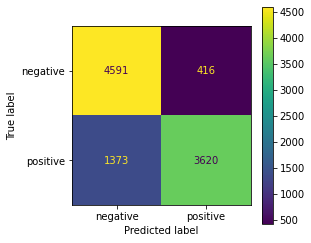

In [ ]:
Eval(test_labels_pre, y_preds_RNN)

## Without Preprocessing

### Building the Model

In [ ]:
max_tokens = 1000
max_len = 100
encoder_2 = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
encoder_2.adapt(train_nrm)

In [ ]:
RNN_model_2 = Sequential()
RNN_model_2.add(Input(shape=(1,), dtype="string"))
RNN_model_2.add(encoder_2)
RNN_model_2.add(Embedding((max_tokens + 1), 128))
RNN_model_2.add(Bidirectional(LSTM(64,  return_sequences=True)))
RNN_model_2.add(Bidirectional(LSTM(32)))
RNN_model_2.add(Dense(64, activation="relu"))
RNN_model_2.add(Dense(1, activation="sigmoid"))

### Training

In [ ]:
save_weights = ModelCheckpoint(   # Saving Weights where validation accuracy is the best
    filepath='/content/drive/MyDrive/Text_checkpoints/RNN_nrm/checkpoint',
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
RNN_model_2.compile(loss="binary_crossentropy", optimizer = optimizer_nrm, metrics=["accuracy"])

In [ ]:
RNN_model_2.summary()

In [ ]:
RNN_2_history = RNN_model_2.fit(train_nrm,
                                train_labels_nrm,
                                epochs=10,
                                batch_size=32,
                                verbose=1,
                                validation_split=0.2,
                                callbacks =[stop_early,PlotLossesKeras()])

### Testing

In [ ]:
RNN_2_test_loss, RNN_2_test_acc = RNN_model_2.evaluate(test_pre, test_labels_pre)
print('Test Loss:', RNN_2_test_loss)
print('Test Accuracy:', RNN_2_test_acc)

In [ ]:
RNN_2_prediction = RNN_model_2.predict(test_pre)

### Evaluation Metrics

In [ ]:
y_preds_RNN_2 = RNN_prediction.flatten()
y_preds_RNN_2 = np.where(y_preds_RNN > 0.5, 1, 0)

In [ ]:
Eval(test_labels_nrm, y_preds_RNN_2)